In [ ]:
pip install pandas nltk Sastrawi

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
!pip install deep-translator

### 1. Import Library

In [ ]:
#Import library yang dibutuhkan
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string

def select_deskripsi_column(df):
  if 'deskripsi' in df.columns:
        return df[['deskripsi']]
  else:
        raise KeyError("Kolom 'deskripsi' tidak ditemukan di DataFrame.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Read DataSet

In [ ]:
df_hotel = pd.read_csv('/content/drive/MyDrive/Data Mining/hotel_bumi_surabaya.csv')
df_hotel = df_hotel.astype(str)
df_hotel = select_deskripsi_column(df_hotel)
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deskripsi  5245 non-null   object
dtypes: object(1)
memory usage: 41.1+ KB


In [ ]:
df_hotel.head()

,deskripsi
0,Awalnya penasaran dengan hotel ini karena dpt ...
1,"Hotel keren di jantung Kota Surabaya, suasanan..."
2,Pengalaman menginap yang menyenangkan. Hotelny...
3,All the best untuk Hotel ini ... Puas dan Nyam...
4,"Pelayanan ok, makan juga.\nWalaupun WCnya terk..."


In [ ]:
from deep_translator import GoogleTranslator
import time

# translator instance (dibuat sekali, bukan tiap fungsi)
translator = GoogleTranslator(source='auto', target='id')

# cache biar ga translate ulang
translation_cache = {}

def translate_to_indonesian(text):
    if not isinstance(text, str) or text.strip() == "":
        return text

    if text in translation_cache:
        return translation_cache[text]

    try:
        translated = translator.translate(text)
        translation_cache[text] = translated
        time.sleep(1)  # delay biar ga di-block
        return translated
    except Exception as e:

        return text

In [ ]:
df_hotel['translated'] = df_hotel['deskripsi'].apply(translate_to_indonesian)

In [ ]:
print(df_hotel[['deskripsi', 'translated']].head(1000))

                                             deskripsi  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayanan ok, makan juga.\nWalaupun WCnya terk...   
..                                                 ...   
995  We get poolview room, nice, clean amd very com...   
996  Second time in this amazing resort. It is wond...   
997  LOVED THE ROOM AND THE AMBIENCE. THE STAFF WAS...   
998                                                  .   
999  Old hotel but still very well maintained. Room...   

                                            translated  
0    Awalnya penasaran dengan hotel ini karena dpt ...  
1    Hotel keren di jantung Kota Surabaya, suasanan...  
2    Pengalaman menginap yang menyenangkan. Hotelny...  
3    All the best untuk Hotel ini ... Puas dan Nyam...  
4    Pelayanan ok,

### 3. Pre Prosesing Data

In [ ]:
# Proses filter
def filtering_text(text):
    # Check if text is a string before processing
    if isinstance(text, str):
        # mengubah tweet menjadi huruf kecil
        text = text.lower()
        # menghilangkan url
        text = re.sub(r'https?:\/\/\S+','',text)
        # menghilangkan mention, link, hashtag
        text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
        # menghilangkan karakter byte (b')
        text = re.sub(r"(b\'{1,2})", "", text)
        # menghilangkan yang bukan huruf
        text = re.sub('[^a-zA-Z]', ' ', text)
        # menghilangkan digit angka
        text = re.sub(r'\d+', '', text)
        # menghilangkan tanda baca
        text = text.translate(str.maketrans('', '', string.punctuation))
        # menghilangkan whitespace berlebih
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""

In [ ]:
df_hotel['filter'] = df_hotel['translated'].apply(filtering_text)

In [ ]:
print(df_hotel[['deskripsi', 'translated', 'filter']].head(1000))

                                             deskripsi  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayanan ok, makan juga.\nWalaupun WCnya terk...   
..                                                 ...   
995  We get poolview room, nice, clean amd very com...   
996  Second time in this amazing resort. It is wond...   
997  LOVED THE ROOM AND THE AMBIENCE. THE STAFF WAS...   
998                                                  .   
999  Old hotel but still very well maintained. Room...   

                                            translated  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayana

In [ ]:
#Proses stopwords dan stemming
def stop_stem(text):
    #stopword
    with open('/content/drive/MyDrive/Data Mining/kamus.txt') as kamus:
        word = kamus.readlines()
        list_stopword = [line.replace('\n',"") for line in word]
    dictionary = ArrayDictionary(list_stopword)
    stopword = StopWordRemover(dictionary)
    text = stopword.remove(text)
    # stemming
    factory_stemmer = StemmerFactory()
    stemmer = factory_stemmer.create_stemmer()
    text = stemmer.stem(text)
    return text

df_hotel['cleaned'] = df_hotel['filter'].apply(stop_stem)

In [ ]:
print(df_hotel[['deskripsi','filter', 'cleaned']].head(1000))

                                             deskripsi  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayanan ok, makan juga.\nWalaupun WCnya terk...   
..                                                 ...   
995  We get poolview room, nice, clean amd very com...   
996  Second time in this amazing resort. It is wond...   
997  LOVED THE ROOM AND THE AMBIENCE. THE STAFF WAS...   
998                                                  .   
999  Old hotel but still very well maintained. Room...   

                                                filter  \
0    awalnya penasaran dengan hotel ini karena dpt ...   
1    hotel keren di jantung kota surabaya suasanany...   
2    pengalaman menginap yang menyenangkan hotelnya...   
3    all the best untuk hotel ini puas dan nyaman s...   
4    pelayana

In [ ]:
import nltk
nltk.download('punkt_tab')

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_hotel['hotel_tokens'] = df_hotel['cleaned'].apply(word_tokenize_wrapper)

print(df_hotel['tweet_tokens'].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [awal, penasaran, dengan, hotel, karena, dpt, ...
1    [hotel, keren, jantung, kota, surabaya, suasan...
2    [alam, inap, senang, hotel, besar, asri, staff...
3    [all, best, untuk, hotel, puas, nyaman, serta,...
4    [layan, ok, makan, walaupun, wcnya, kes, lama,...
Name: tweet_tokens, dtype: object


In [ ]:
kamus_normalisasi = pd.read_csv("/content/drive/MyDrive/Data Mining/slang.csv")

kata_normalisasi_dict = {}

for index, row in kamus_normalisasi.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1]

def normalisasi_kata(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

df_hotel['normalisasi'] = df_hotel['hotel_tokens'].apply(normalisasi_kata)

df_hotel['normalisasi'].head(10)

<ipython-input-18-2c893c9a7494>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in kata_normalisasi_dict:
<ipython-input-18-2c893c9a7494>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kata_normalisasi_dict[row[0]] = row[1]


,normalisasi
0,"[awal, penasaran, dengan, hotel, karena, dapat..."
1,"[hotel, keren, jantung, kota, surabaya, suasan..."
2,"[alam, inap, senang, hotel, besar, asri, staff..."
3,"[semua, terbaik, untuk, hotel, puas, nyaman, s..."
4,"[layan, ok, makan, walaupun, wcnya, kes, lama,..."
5,"[untuk, cepat, cek, di, luar, biasa, sat, sete..."
6,"[sudah, langgan, nginep, sini, tiap, surabaya,..."
7,"[aku, mes, hanya, untuk, satu, malam, untuk, h..."
8,"[lokasi, strategis, seluruh, staf, sangat, ram..."
9,"[hotel, nyaman, bagus, untuk, staycation, sama..."


### 4. LDA

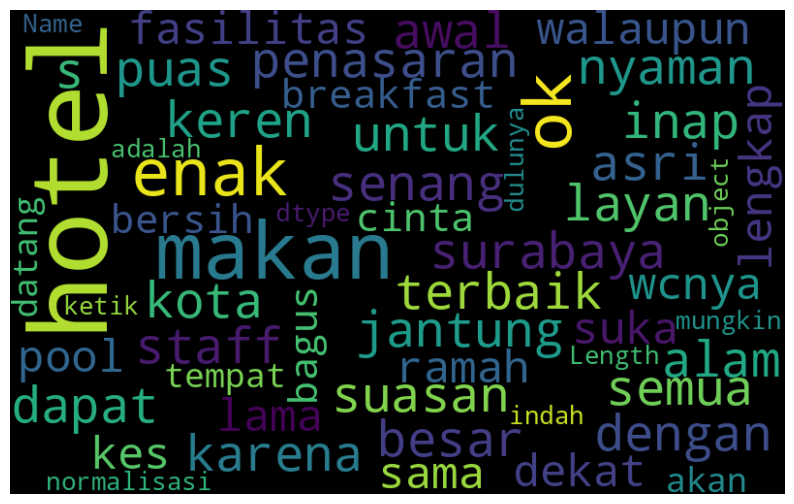

In [ ]:
# WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=52, background_color='black',  max_font_size=110).generate(str(df_hotel['normalisasi'].dropna()))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
!pip install vaderSentiment

In [ ]:
#importing and initialising the VADER analyser
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df_hotel['normalisasi'].shape[0]):
    # Join the list of words into a single string
    text = ' '.join(df_hotel['normalisasi'][i])
    compound = analyzer.polarity_scores(text)["compound"]
    pos = analyzer.polarity_scores(text)["pos"]
    neu = analyzer.polarity_scores(text)["neu"]
    neg = analyzer.polarity_scores(text)["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

sentiments_score = pd.DataFrame.from_dict(scores)
df_hotel = df_hotel.join(sentiments_score, rsuffix='_sentiment')
df_hotel

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,deskripsi,translated,filter,cleaned,tweet_tokens,hotel_tokens,normalisasi,Compound,Positive,Negative,Neutral,Compound_sentiment,Positive_sentiment,Negative_sentiment,Neutral_sentiment,Polarity,Compound_sentiment,Positive_sentiment,Negative_sentiment,Neutral_sentiment
0,Awalnya penasaran dengan hotel ini karena dpt ...,Awalnya penasaran dengan hotel ini karena dpt ...,awalnya penasaran dengan hotel ini karena dpt ...,awal penasaran dengan hotel karena dpt rekomen...,"[awal, penasaran, dengan, hotel, karena, dpt, ...","[awal, penasaran, dengan, hotel, karena, dpt, ...","[awal, penasaran, dengan, hotel, karena, dapat...",0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,Neutral,0.0000,0.000,0.000,1.000
1,"Hotel keren di jantung Kota Surabaya, suasanan...","Hotel keren di jantung Kota Surabaya, suasanan...",hotel keren di jantung kota surabaya suasanany...,hotel keren jantung kota surabaya suasana asa ...,"[hotel, keren, jantung, kota, surabaya, suasan...","[hotel, keren, jantung, kota, surabaya, suasan...","[hotel, keren, jantung, kota, surabaya, suasan...",0.2023,0.067,0.000,0.933,0.2023,0.067,0.000,0.933,Positive,0.2023,0.067,0.000,0.933
2,Pengalaman menginap yang menyenangkan. Hotelny...,Pengalaman menginap yang menyenangkan. Hotelny...,pengalaman menginap yang menyenangkan hotelnya...,alam inap senang hotel besar asri staff ramah ...,"[alam, inap, senang, hotel, besar, asri, staff...","[alam, inap, senang, hotel, besar, asri, staff...","[alam, inap, senang, hotel, besar, asri, staff...",0.9493,0.138,0.011,0.850,0.7003,0.067,0.012,0.921,Positive,0.7003,0.067,0.012,0.921
3,All the best untuk Hotel ini ... Puas dan Nyam...,All the best untuk Hotel ini ... Puas dan Nyam...,all the best untuk hotel ini puas dan nyaman s...,all best untuk hotel puas nyaman serta suka sa...,"[all, best, untuk, hotel, puas, nyaman, serta,...","[all, best, untuk, hotel, puas, nyaman, serta,...","[semua, terbaik, untuk, hotel, puas, nyaman, s...",0.6369,0.189,0.000,0.811,0.0000,0.000,0.000,1.000,Positive,0.0000,0.000,0.000,1.000
4,"Pelayanan ok, makan juga.\nWalaupun WCnya terk...","Pelayanan ok, makan juga.\nWalaupun WCnya terk...",pelayanan ok makan juga walaupun wcnya terkesa...,layan ok makan walaupun wcnya kes lama cukup b...,"[layan, ok, makan, walaupun, wcnya, kes, lama,...","[layan, ok, makan, walaupun, wcnya, kes, lama,...","[layan, ok, makan, walaupun, wcnya, kes, lama,...",0.2960,0.058,0.000,0.942,0.2960,0.056,0.000,0.944,Positive,0.2960,0.056,0.000,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,"Fasilitas lengkap, makanan enak2, ramah dan de...","Fasilitas lengkap, makanan enak2, ramah dan de...",fasilitas lengkap makanan enak ramah dan dekat...,fasilitas lengkap makan enak ramah dekat mana,"[fasilitas, lengkap, makan, enak, ramah, dekat...","[fasilitas, lengkap, makan, enak, ramah, dekat...","[fasilitas, lengkap, makan, enak, ramah, dekat...",0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,Neutral,0.0000,0.000,0.000,1.000
5241,"Suka banget sama pool nya, breakfast juga ok","Suka banget sama pool nya, breakfast juga ok",suka banget sama pool nya breakfast juga ok,suka sama pool breakfast ok,"[suka, sama, pool, breakfast, ok]","[suka, sama, pool, breakfast, ok]","[suka, sama, pool, breakfast, ok]",0.2960,0.355,0.000,0.645,0.2960,0.355,0.000,0.645,Positive,0.2960,0.355,0.000,0.645
5242,Hotel bersih dan bagus.. makanan enak,Hotel bersih dan bagus.. makanan enak,hotel bersih dan bagus makanan enak,hotel bersih bagus makan enak,"[hotel, bersih, bagus, makan, enak]","[hotel, bersih, bagus, makan, enak]","[hotel, bersih, bagus, makan, enak]",0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,Neutral,0.0000,0.000,0.000,1.000
5243,Love this place will come again,Cintai tempat ini akan datang lagi,cintai tempat ini akan datang lagi,cinta tempat akan datang,"[cinta, tempat, akan, datang]","[cinta, tempat, akan, datang]","[cinta, tempat, akan, datang]",0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,N

In [ ]:
# Set type of polarity
polarity = []

for i in range(len(df_hotel)):
    if (df_hotel['Compound'][i] < 0):
        polarity.append("Negative")
    elif (df_hotel['Compound'][i] > 0):
        polarity.append("Positive")
    else:
        polarity.append("Neutral")

polarity = pd.DataFrame(polarity)
df_hotel['Polarity'] = polarity
df_hotel.head()

,deskripsi,translated,filter,cleaned,tweet_tokens,hotel_tokens,normalisasi,Compound,Positive,Negative,Neutral,Compound_sentiment,Positive_sentiment,Negative_sentiment,Neutral_sentiment,Polarity,Compound_sentiment,Positive_sentiment,Negative_sentiment,Neutral_sentiment
0,Awalnya penasaran dengan hotel ini karena dpt ...,Awalnya penasaran dengan hotel ini karena dpt ...,awalnya penasaran dengan hotel ini karena dpt ...,awal penasaran dengan hotel karena dpt rekomen...,"[awal, penasaran, dengan, hotel, karena, dpt, ...","[awal, penasaran, dengan, hotel, karena, dpt, ...","[awal, penasaran, dengan, hotel, karena, dapat...",0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,Neutral,0.0000,0.000,0.000,1.000
1,"Hotel keren di jantung Kota Surabaya, suasanan...","Hotel keren di jantung Kota Surabaya, suasanan...",hotel keren di jantung kota surabaya suasanany...,hotel keren jantung kota surabaya suasana asa ...,"[hotel, keren, jantung, kota, surabaya, suasan...","[hotel, keren, jantung, kota, surabaya, suasan...","[hotel, keren, jantung, kota, surabaya, suasan...",0.2023,0.067,0.000,0.933,0.2023,0.067,0.000,0.933,Positive,0.2023,0.067,0.000,0.933
2,Pengalaman menginap yang menyenangkan. Hotelny...,Pengalaman menginap yang menyenangkan. Hotelny...,pengalaman menginap yang menyenangkan hotelnya...,alam inap senang hotel besar asri staff ramah ...,"[alam, inap, senang, hotel, besar, asri, staff...","[alam, inap, senang, hotel, besar, asri, staff...","[alam, inap, senang, hotel, besar, asri, staff...",0.9493,0.138,0.011,0.850,0.7003,0.067,0.012,0.921,Positive,0.7003,0.067,0.012,0.921
3,All the best untuk Hotel ini ... Puas dan Nyam...,All the best untuk Hotel ini ... Puas dan Nyam...,all the best untuk hotel ini puas dan nyaman s...,all best untuk hotel puas nyaman serta suka sa...,"[all, best, untuk, hotel, puas, nyaman, serta,...","[all, best, untuk, hotel, puas, nyaman, serta,...","[semua, terbaik, untuk, hotel, puas, nyaman, s...",0.6369,0.189,0.000,0.811,0.0000,0.000,0.000,1.000,Positive,0.0000,0.000,0.000,1.000
4,"Pelayanan ok, makan juga.\nWalaupun WCnya terk...","Pelayanan ok, makan juga.\nWalaupun WCnya terk...",pelayanan ok makan juga walaupun wcnya terkesa...,layan ok makan walaupun wcnya kes lama cukup b...,"[layan, ok, makan, walaupun, wcnya, kes, lama,...","[layan, ok, makan, walaupun, wcnya, kes, lama,...","[layan, ok, makan, walaupun, wcnya, kes, lama,...",0.2960,0.058,0.000,0.942,0.2960,0.056,0.000,0.944,Positive,0.2960,0.056,0.000,0.944


In [ ]:
df_hotel['Polarity'].value_counts()

,count
Polarity,
Neutral,4549
Positive,598
Negative,98


<Axes: xlabel='Polarity'>

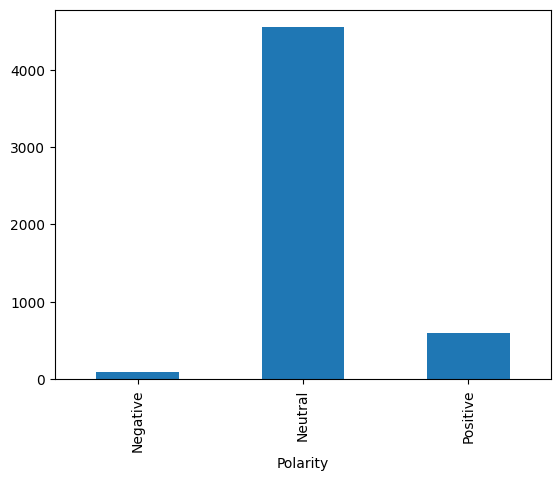

In [ ]:
df_hotel.groupby('Polarity').size().plot(kind='bar')

In [ ]:
i= 1
print("Raw tweet : ",df_hotel.deskripsi[i])
print("\nTraslate tweet : ",df_hotel.translated[i])
print("\nCleaned tweet : ",df_hotel.cleaned[i])
print("\nVADER Polarity scores : ",df_hotel.Polarity[i])
print("\nCompound Sentiment : ",df_hotel.Compound[i])

Raw tweet :  Hotel keren di jantung Kota Surabaya, suasananya terasa seperti tidak berada ditengah Kota surabaya, lebih seperti berada di Bali. Makanannya enak2, staf, satpam dan ob semuanya ramah, recommended banget dah

Traslate tweet :  Hotel keren di jantung Kota Surabaya, suasananya terasa seperti tidak berada ditengah Kota surabaya, lebih seperti berada di Bali. Makanannya enak2, staf, satpam dan ob semuanya ramah, recommended banget dah

Cleaned tweet :  hotel keren jantung kota surabaya suasana asa seperti tidak ada tengah kota surabaya lebih seperti ada bal makan enak staf satpam ob semua ramah recommended dah

VADER Polarity scores :  Positive

Compound Sentiment :  0.2023
